### Random Forest in Python

### Import Packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

### Load in Data

In [3]:
iris = sns.load_dataset('iris')

### Data Wrangling

In [4]:
x = iris.drop('species', axis=1)
y = iris['species']

### Train Test Split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

### Initial Random Forest Model

In [6]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

### Evaluate Model Fit

In [7]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### Hyperparameter Tuning in Python

### Number of Estimators

In [10]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

NameError: name 'accuracy_score' is not defined

ValueError: x and y must have same first dimension, but have shapes (11,) and (0,)

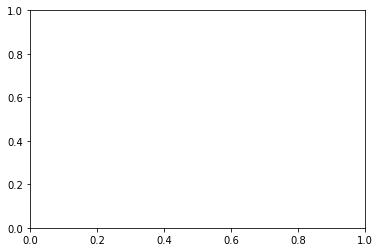

In [11]:
plt.plot(n_estimators_array, results)


### Tuning the Remaining Three

In [12]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}
